## import ##

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image

import openslide
from openslide import OpenSlide, OpenSlideError
from torch.utils.data import DataLoader

import sys
sys.path.append("/github/DigitalHematology'")
import WBC_loader
import time

/root/.pyenv/versions/3.10.9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Implementation of dataloader ##

In [2]:
import torch
torch.cuda.get_device_name(0)

'NVIDIA RTX A6000'

In [3]:
slide_path = "/workspace/2024_05_27__1138-04.tif"

In [6]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024,w=1024,extra_padding=64,x_start=30000,x_end=40000,y_start=70000,y_end=80000,qc=True, wbc_qc=False)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)  

Total Patches: 100
Final Patches (passed QC): 50
15.648092031478882


In [7]:
start = time.time()
cropped_dataset = WBC_loader.SmearDatasetQC(slide_path=slide_path,h=1024,w=1024,extra_padding=64,x_start=30000,x_end=40000,y_start=70000,y_end=80000,qc=True, wbc_qc=True)
cropped_dataloader = DataLoader(cropped_dataset, batch_size=16, shuffle=False)
end = time.time()
print(end - start)  

Total Patches: 100
Total number of WBC detected: 42
43.09160494804382


## Confirmation of extracted WBC images ###

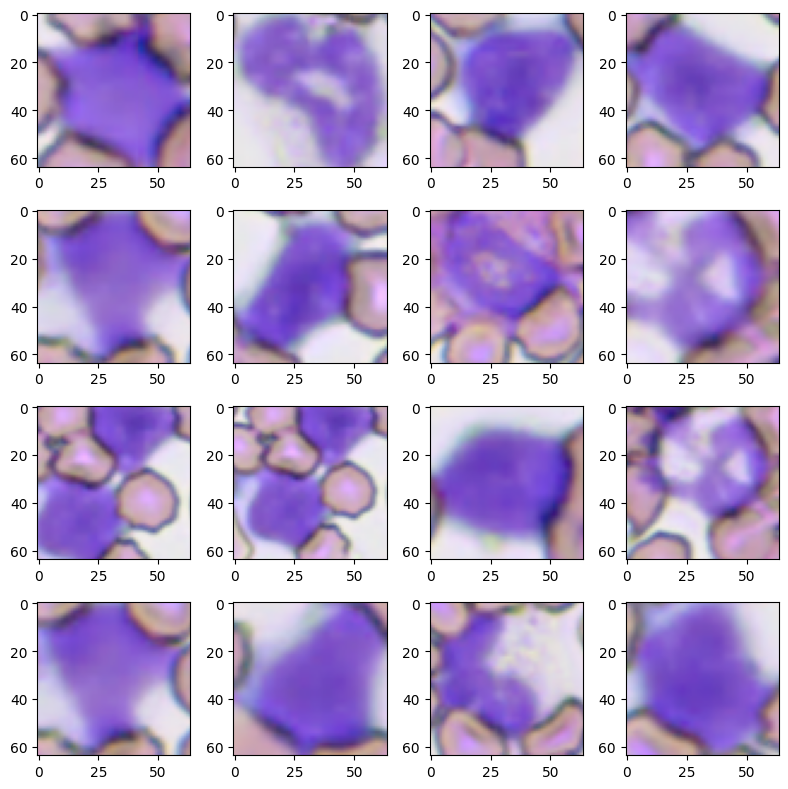

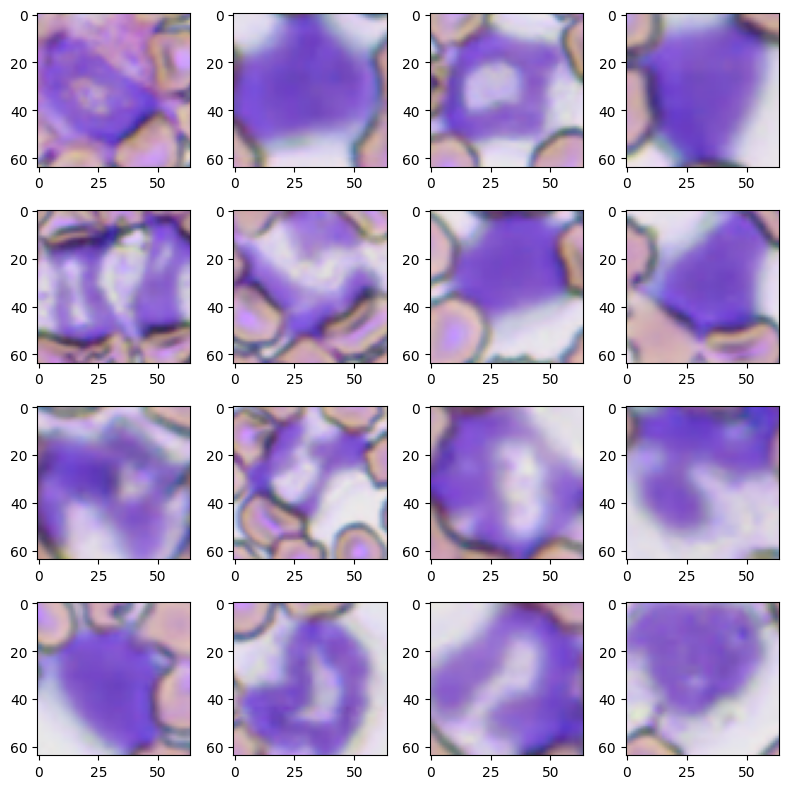

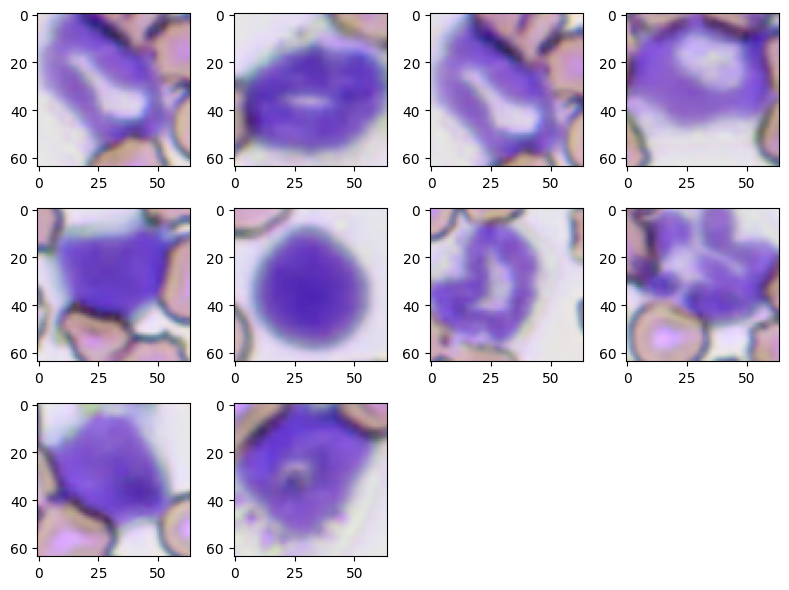

In [8]:
for i, (img,coords) in enumerate(cropped_dataloader):
    fig = plt.figure(figsize=(8, 2*(((len(img)-1)//4)+1)))
    for n in range(len(img)):
        ax = fig.add_subplot((((len(img)-1)//4)+1), 4, n+1)
        ax.imshow(img[n])
    plt.tight_layout()
    plt.show()